In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

### csv_read

In [3]:
card_01 = pd.read_csv("card_202001.csv")
card_02 = pd.read_csv("card_202002.csv")
card_03 = pd.read_csv("card_202003.csv")
card_04 = pd.read_csv("card_202004.csv")
card_05 = pd.read_csv("card_202005.csv")
card_06 = pd.read_csv("card_202006.csv")

card_01.head()

,receipt_dttm,adstrd_code,adstrd_nm,mrhst_induty_cl_code,mrhst_induty_cl_nm,selng_cascnt,salamt
0,20200104,1174066000,성내3동,7041,약국,463,5843230.0
1,20200104,1174066000,성내3동,7022,치과의원,33,7835550.0
2,20200104,1174066000,성내3동,7021,한의원,53,4589800.0
3,20200104,1174066000,성내3동,7020,의원,339,9267240.0
4,20200104,1174066000,성내3동,6110,자동차정비,19,4441000.0


In [4]:
adstrd=pd.read_csv('adstrd_master.csv')
adstrd['adstrd_code']=adstrd['adstrd_code'].astype(str)
adstrd['exp']=adstrd['adstrd_code'].apply(lambda x:x[:5])
adstrd['total_adstrd']=adstrd['brtc_nm']+' '+adstrd['signgu_nm']

adstrd_name=adstrd[['exp','total_adstrd']]
adstrd_name=adstrd_name.drop_duplicates(['exp'],keep='first')
adstrd_name=adstrd_name.reset_index()
adstrd_name=adstrd_name.drop(['index'],axis=1)
adstrd_name_seoul = adstrd_name[0:25]
adstrd_name_seoul

,exp,total_adstrd
0,11110,서울특별시 종로구
1,11140,서울특별시 중구
2,11170,서울특별시 용산구
3,11200,서울특별시 성동구
4,11215,서울특별시 광진구
5,11230,서울특별시 동대문구
6,11260,서울특별시 중랑구
7,11290,서울특별시 성북구
8,11305,서울특별시 강북구
9,11320,서울특별시 도봉구


#### 1월 데이터 가공

In [5]:
adstrd_code_01 = card_01['adstrd_code']
mrhst_induty_cl_code_01 = card_01['mrhst_induty_cl_code']

adstrd_code_new = []
mrhst_induty_cl_code_new = []

for i in adstrd_code_01:
    adstrd_code_new.append(int(i/100000))
    
for i in mrhst_induty_cl_code_01:
    mrhst_induty_cl_code_new.append(int(i/100))

adstrd_code_new

data_card01 = {"receipt_dttm" : card_01['receipt_dttm'], "adstrd_code" : adstrd_code_new, "adstrd_nm" : card_01['adstrd_nm'],
               "mrhst_induty_cl_code": mrhst_induty_cl_code_new, "mrhst_induty_cl_nm" : card_01['mrhst_induty_cl_nm'],
               "selng_cascnt" : card_01['selng_cascnt'], "salamt" : card_01['salamt']}

df_card01 = pd.DataFrame(data_card01)
df_card01.head()

,receipt_dttm,adstrd_code,adstrd_nm,mrhst_induty_cl_code,mrhst_induty_cl_nm,selng_cascnt,salamt
0,20200104,11740,성내3동,70,약국,463,5843230.0
1,20200104,11740,성내3동,70,치과의원,33,7835550.0
2,20200104,11740,성내3동,70,한의원,53,4589800.0
3,20200104,11740,성내3동,70,의원,339,9267240.0
4,20200104,11740,성내3동,61,자동차정비,19,4441000.0


In [6]:
df_card01['mrhst_induty_cl_code'].value_counts()
code = []
for i in df_card01['mrhst_induty_cl_code'].value_counts().index:
    code.append(i)
print(code , '\n')
print(len(code), "\n")
code.sort()
print(code)

[80, 70, 83, 71, 40, 21, 51, 61, 42, 44, 91, 50, 22, 93, 92, 90, 99, 20, 10, 52, 33, 31, 82, 84, 34, 81, 43, 32, 30, 11, 60, 41, 62, 96, 95] 

35 

[10, 11, 20, 21, 22, 30, 31, 32, 33, 34, 40, 41, 42, 43, 44, 50, 51, 52, 60, 61, 62, 70, 71, 80, 81, 82, 83, 84, 90, 91, 92, 93, 95, 96, 99]


In [7]:
seoul01 = []
seoul01_sum = []

is_code = df_card01['adstrd_code'] == 11110

for i in code:
    is_name = df_card01['mrhst_induty_cl_code'] == i
    seoul = df_card01[is_code & is_name]
    seoul01.append(seoul)
    seoul = seoul.astype({'selng_cascnt' : int})
    sum_num = sum(seoul['selng_cascnt'])
    seoul01_sum.append(sum_num)
    
seoul01[0]
print(seoul01_sum)
print(code)

mean = []

for i in seoul01_sum:
    mean.append(i/28)

Jongrogu01 = pd.DataFrame({'code' : code, 'total_sum' : seoul01_sum, 'mean' : mean})
Jongrogu01

[14543, 6965, 5147, 61849, 15203, 39, 3988, 178, 3042, 1285, 625096, 5079, 19284, 2756, 21386, 274046, 2971, 1412, 85, 38629, 861185, 251856, 25082, 1477633, 5534, 3032, 114966, 1130, 1155, 33556, 1132, 3011, 0, 64, 21373]
[10, 11, 20, 21, 22, 30, 31, 32, 33, 34, 40, 41, 42, 43, 44, 50, 51, 52, 60, 61, 62, 70, 71, 80, 81, 82, 83, 84, 90, 91, 92, 93, 95, 96, 99]


,code,total_sum,mean
0,10,14543,519.392857
1,11,6965,248.750000
2,20,5147,183.821429
3,21,61849,2208.892857
4,22,15203,542.964286
5,30,39,1.392857
6,31,3988,142.428571
7,32,178,6.357143
8,33,3042,108.642857
9,34,1285,45.892857


### 상대값 = {(n월 평균 - 1월 평균)/(1월 평균)} * 100

### 2월 데이터 가공

In [8]:
adstrd_code_02 = card_02['adstrd_code']
mrhst_induty_cl_code_02 = card_02['mrhst_induty_cl_code']

adstrd_code_new = []
mrhst_induty_cl_code_new = []

for i in adstrd_code_02:
    adstrd_code_new.append(int(i/100000))
    
for i in mrhst_induty_cl_code_02:
    mrhst_induty_cl_code_new.append(int(i/100))

adstrd_code_new

data_card02 = {"receipt_dttm" : card_02['receipt_dttm'], "adstrd_code" : adstrd_code_new, "adstrd_nm" : card_02['adstrd_nm'],
               "mrhst_induty_cl_code": mrhst_induty_cl_code_new, "mrhst_induty_cl_nm" : card_02['mrhst_induty_cl_nm'],
               "selng_cascnt" : card_02['selng_cascnt'], "salamt" : card_02['salamt']}

df_card02 = pd.DataFrame(data_card02)
df_card02.head()

,receipt_dttm,adstrd_code,adstrd_nm,mrhst_induty_cl_code,mrhst_induty_cl_nm,selng_cascnt,salamt
0,20200201,11680,논현2동,40,대형할인점,67,1007350.0
1,20200201,11410,북가좌2동,71,사우나,7,49000.0
2,20200201,11260,면목3.8동,44,기타잡화,11,79400.0
3,20200201,11320,창5동,52,컴 퓨 터,1,15000.0
4,20200201,11470,신월6동,90,기타건축자재,3,24500.0


#### 2월 상반기

In [9]:
is_date = df_card02['receipt_dttm'] < 20200215
df_card02_1 = df_card02[is_date]
df_card02_1.head()

,receipt_dttm,adstrd_code,adstrd_nm,mrhst_induty_cl_code,mrhst_induty_cl_nm,selng_cascnt,salamt
0,20200201,11680,논현2동,40,대형할인점,67,1007350.0
1,20200201,11410,북가좌2동,71,사우나,7,49000.0
2,20200201,11260,면목3.8동,44,기타잡화,11,79400.0
3,20200201,11320,창5동,52,컴 퓨 터,1,15000.0
4,20200201,11470,신월6동,90,기타건축자재,3,24500.0


In [10]:
seoul02_1 = []
seoul02_sum_1 = []

is_code = df_card02_1['adstrd_code'] == 11110

for i in code:
    is_name = df_card02_1['mrhst_induty_cl_code'] == i
    seoul = df_card02_1[is_code & is_name]
    seoul02_1.append(seoul)
    seoul = seoul.astype({'selng_cascnt' : int})
    sum_num = sum(seoul['selng_cascnt'])
    seoul02_sum_1.append(sum_num)
    
print(seoul02_sum_1)
print(code)

mean = []

for i in seoul02_sum_1:
    mean.append(i/14)

Jongrogu02_1 = pd.DataFrame({'code' : code, 'total_sum' : seoul02_sum_1, 'mean' : mean})
Jongrogu02_1

[3431, 593, 1336, 17115, 4823, 29, 1028, 125, 1962, 358, 137824, 3004, 3322, 678, 4382, 49299, 1321, 684, 59, 8875, 44048, 57306, 6512, 300898, 1153, 722, 26415, 493, 537, 13414, 610, 1089, 0, 80, 6204]
[10, 11, 20, 21, 22, 30, 31, 32, 33, 34, 40, 41, 42, 43, 44, 50, 51, 52, 60, 61, 62, 70, 71, 80, 81, 82, 83, 84, 90, 91, 92, 93, 95, 96, 99]


,code,total_sum,mean
0,10,3431,245.071429
1,11,593,42.357143
2,20,1336,95.428571
3,21,17115,1222.500000
4,22,4823,344.500000
5,30,29,2.071429
6,31,1028,73.428571
7,32,125,8.928571
8,33,1962,140.142857
9,34,358,25.571429


### 1월&2월(상반기) 평균 비교

In [11]:
per_02_1 = []

for i in range(0, len(Jongrogu01['mean'])) :
    a = Jongrogu01['mean'][i]
    b = Jongrogu02_1['mean'][i]
    if(a != 0):
        per_02_1.append( ( ( b - a ) / a ) * 100 )
    else:
        per_02_1.append(-1)
per_02_1

[-52.815787664168326,
 -82.97200287150037,
 -48.08626384301535,
 -44.655532021536324,
 -36.55199631651647,
 48.71794871794874,
 -48.445336008024064,
 40.4494382022472,
 28.99408284023669,
 -44.280155642023345,
 -55.90309328487144,
 18.291002165780675,
 -65.54656710226095,
 -50.79825834542816,
 -59.01991957355279,
 -64.02136867533189,
 -11.073712554695387,
 -3.1161473087818794,
 38.82352941176472,
 -54.05006601258122,
 -89.77037454205542,
 -54.49304364398705,
 -48.07431624272386,
 -59.2729723821815,
 -58.33032164799421,
 -52.37467018469657,
 -54.04728354470018,
 -12.743362831858398,
 -7.012987012987021,
 -20.050065562045532,
 7.7738515901059975,
 -27.66522749916971,
 -1,
 150.00000000000003,
 -41.94544518785383]

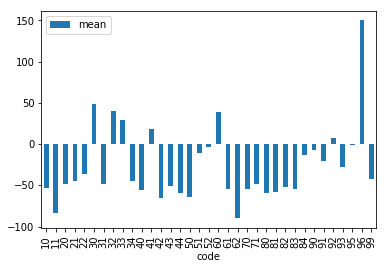

In [12]:
data_02_1 = pd.DataFrame({"code": code, "mean": per_02_1})
data_02_1.plot(x = "code", y = "mean", kind = 'bar')

# '종로구' 의 1월 평균과 2월 평균(상반기)을 각 항목별로 비교한 그래프

#### 2월 하반기

In [13]:
is_date = df_card02['receipt_dttm'] > 20200214
df_card02_2 = df_card02[is_date]
df_card02_2.head()

,receipt_dttm,adstrd_code,adstrd_nm,mrhst_induty_cl_code,mrhst_induty_cl_nm,selng_cascnt,salamt
160531,20200215,11710,거여1동,70,동물병원,13,730100.0
160532,20200215,11680,대치4동,70,약국,442,7531530.0
160533,20200215,11650,서초1동,80,서양음식,1840,19929464.0
160534,20200215,11440,대흥동,71,미 용 원,59,2890700.0
160535,20200215,11260,망우본동,70,약국,394,6041060.0


In [14]:
seoul02_2 = []
seoul02_sum_2 = []

is_code = df_card02_2['adstrd_code'] == 11110

for i in code:
    is_name = df_card02_2['mrhst_induty_cl_code'] == i
    seoul = df_card02_2[is_code & is_name]
    seoul02_2.append(seoul)
    seoul = seoul.astype({'selng_cascnt' : int})
    sum_num = sum(seoul['selng_cascnt'])
    seoul02_sum_2.append(sum_num)
    
seoul02_2[0]
print(seoul02_sum_2)
print(code)

mean = []

for i in seoul02_sum_2:
    mean.append(i/15)

Jongrogu02_2 = pd.DataFrame({'code' : code, 'total_sum' : seoul02_sum_2, 'mean' : mean})
Jongrogu02_2

[7633, 1120, 2777, 36070, 9667, 38, 2583, 289, 4833, 820, 372638, 7440, 7347, 1543, 9829, 106573, 3439, 1477, 155, 21172, 966566, 133563, 14682, 686455, 2414, 1526, 63425, 1134, 1402, 35084, 1417, 1736, 0, 261, 65206]
[10, 11, 20, 21, 22, 30, 31, 32, 33, 34, 40, 41, 42, 43, 44, 50, 51, 52, 60, 61, 62, 70, 71, 80, 81, 82, 83, 84, 90, 91, 92, 93, 95, 96, 99]


,code,total_sum,mean
0,10,7633,508.866667
1,11,1120,74.666667
2,20,2777,185.133333
3,21,36070,2404.666667
4,22,9667,644.466667
5,30,38,2.533333
6,31,2583,172.200000
7,32,289,19.266667
8,33,4833,322.200000
9,34,820,54.666667


### 1월 & 2월(하반기) 평균 비교

In [15]:
per_02_2 = []

for i in range(0, len(Jongrogu01['mean'])) :
    a = Jongrogu01['mean'][i]
    b = Jongrogu02_2['mean'][i]
    if(a != 0):
        per_02_2.append( ( ( b - a ) / a ) * 100 )
    else:
        per_02_2.append(-1)
per_02_2

[-2.026633661096969,
 -69.98324958123952,
 0.7136843468687153,
 8.86298350283215,
 18.694117389111813,
 81.88034188034187,
 20.90270812437312,
 203.07116104868913,
 196.5680473372781,
 19.118028534370936,
 11.277457115920333,
 173.43965347509354,
 -28.881974694046868,
 4.50895016932752,
 -14.208048879329164,
 -27.40771014111986,
 116.07090766296422,
 95.25967894239848,
 240.39215686274514,
 2.3093185603216924,
 109.50858797277397,
 -1.0078775173114742,
 9.2672035722829,
 -13.281398922014699,
 -18.57366582339477,
 -6.05101143359719,
 2.9811712448317946,
 87.32743362831859,
 126.58585858585857,
 95.16668653395321,
 133.66313309776208,
 7.623159526181773,
 -1,
 661.25,
 469.49359784151346]

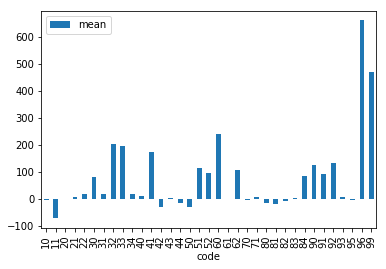

In [16]:
data_02_2 = pd.DataFrame({"code": code, "mean": per_02_2})
data_02_2.plot(x = "code", y = "mean", kind = 'bar')

### 3월 데이터 가공

In [17]:
adstrd_code_03 = card_03['adstrd_code']
mrhst_induty_cl_code_03 = card_03['mrhst_induty_cl_code']

adstrd_code_new = []
mrhst_induty_cl_code_new = []

for i in adstrd_code_03:
    adstrd_code_new.append(int(i/100000))
    
for i in mrhst_induty_cl_code_03:
    mrhst_induty_cl_code_new.append(int(i/100))

adstrd_code_new

data_card03 = {"receipt_dttm" : card_03['receipt_dttm'], "adstrd_code" : adstrd_code_new, "adstrd_nm" : card_03['adstrd_nm'],
               "mrhst_induty_cl_code": mrhst_induty_cl_code_new, "mrhst_induty_cl_nm" : card_03['mrhst_induty_cl_nm'],
               "selng_cascnt" : card_03['selng_cascnt'], "salamt" : card_03['salamt']}

df_card03 = pd.DataFrame(data_card03)
df_card03.head()

,receipt_dttm,adstrd_code,adstrd_nm,mrhst_induty_cl_code,mrhst_induty_cl_nm,selng_cascnt,salamt
0,20200301,11545,시흥4동,90,조명 기구,1,15000.0
1,20200301,11140,광희동,80,일반한식,952,25644550.0
2,20200301,11710,잠실본동,71,미 용 원,121,6493950.0
3,20200301,11620,서림동,83,정 육 점,50,1273200.0
4,20200301,11740,둔촌2동,71,미 용 원,47,1636300.0


### 3월 상반기

In [18]:
is_date = df_card03['receipt_dttm'] < 20200316
df_card03_1 = df_card03[is_date]
df_card03_1.head()

,receipt_dttm,adstrd_code,adstrd_nm,mrhst_induty_cl_code,mrhst_induty_cl_nm,selng_cascnt,salamt
0,20200301,11545,시흥4동,90,조명 기구,1,15000.0
1,20200301,11140,광희동,80,일반한식,952,25644550.0
2,20200301,11710,잠실본동,71,미 용 원,121,6493950.0
3,20200301,11620,서림동,83,정 육 점,50,1273200.0
4,20200301,11740,둔촌2동,71,미 용 원,47,1636300.0


In [20]:
seoul03_1 = []
seoul03_sum_1 = []

is_code = df_card03_1['adstrd_code'] == 11110

for i in code:
    is_name = df_card03_1['mrhst_induty_cl_code'] == i
    seoul = df_card03_1[is_code & is_name]
    seoul03_1.append(seoul)
    seoul = seoul.astype({'selng_cascnt' : int})
    sum_num = sum(seoul['selng_cascnt'])
    seoul03_sum_1.append(sum_num)
    
print(seoul03_sum_1)
print(code)

mean = []

for i in seoul03_sum_1:
    mean.append(i/15)

Jongrogu03_1 = pd.DataFrame({'code' : code, 'total_sum' : seoul03_sum_1, 'mean' : mean})
Jongrogu03_1

[4986, 395, 2380, 25139, 5307, 26, 2898, 245, 4418, 641, 307576, 6387, 6043, 1487, 7165, 86742, 1361, 536, 171, 18417, 132055, 127294, 12479, 554640, 1748, 1318, 56492, 1166, 1261, 29883, 1492, 1276, 0, 411, 10455]
[10, 11, 20, 21, 22, 30, 31, 32, 33, 34, 40, 41, 42, 43, 44, 50, 51, 52, 60, 61, 62, 70, 71, 80, 81, 82, 83, 84, 90, 91, 92, 93, 95, 96, 99]


,code,total_sum,mean
0,10,4986,332.400000
1,11,395,26.333333
2,20,2380,158.666667
3,21,25139,1675.933333
4,22,5307,353.800000
5,30,26,1.733333
6,31,2898,193.200000
7,32,245,16.333333
8,33,4418,294.533333
9,34,641,42.733333


### 1월 & 3월 (상반기) 평균 비교

In [21]:
per_03_1 = []

for i in range(0, len(Jongrogu01['mean'])) :
    a = Jongrogu01['mean'][i]
    b = Jongrogu03_1['mean'][i]
    if(a != 0):
        per_03_1.append( ( ( b - a ) / a ) * 100 )
    else:
        per_03_1.append(-1)
per_03_1


[-36.00220037131266,
 -89.41373534338358,
 -13.68434686872613,
 -24.127902903307522,
 -34.839176478326635,
 24.444444444444454,
 35.64694082246741,
 156.92883895131084,
 171.10234494849882,
 -6.8845654993514955,
 -8.151409276868405,
 134.73912187438472,
 -41.50452879762151,
 0.7160135462022301,
 -37.4606440350385,
 -40.9156127073557,
 -14.488948726579157,
 -29.14069877242682,
 275.5294117647059,
 -11.003650107432247,
 -71.37633996566746,
 -5.654236283167107,
 -7.128086542806273,
 -29.933346101501524,
 -41.03842910492712,
 -18.856640281442402,
 -8.275722097547687,
 92.61356932153394,
 103.79797979797978,
 66.23435451186079,
 146.03062426383983,
 -20.894497951953955,
 -1,
 1098.75,
 -8.688532260328449]

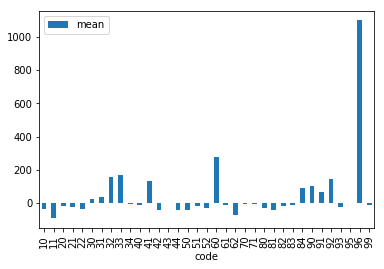

In [22]:
data_03_1 = pd.DataFrame({"code": code, "mean": per_03_1})
data_03_1.plot(x = "code", y = "mean", kind = 'bar')

### 3월 하반기

In [23]:
is_date = df_card03['receipt_dttm'] > 20200315
df_card03_2 = df_card03[is_date]
df_card03_2.head()

,receipt_dttm,adstrd_code,adstrd_nm,mrhst_induty_cl_code,mrhst_induty_cl_nm,selng_cascnt,salamt
376104,20200316,11290,삼선동,10,기타숙박업,12,528000.0
376105,20200316,11680,역삼1동,80,서양음식,5424,70725305.0
376106,20200316,11440,서교동,80,일반한식,4441,131872050.0
376107,20200316,11740,명일2동,40,편 의 점,404,2209050.0
376108,20200316,11380,갈현1동,71,미 용 원,37,1616800.0


In [24]:
seoul03_2 = []
seoul03_sum_2 = []

is_code = df_card03_2['adstrd_code'] == 11110

for i in code:
    is_name = df_card03_2['mrhst_induty_cl_code'] == i
    seoul = df_card03_2[is_code & is_name]
    seoul03_2.append(seoul)
    seoul = seoul.astype({'selng_cascnt' : int})
    sum_num = sum(seoul['selng_cascnt'])
    seoul03_sum_2.append(sum_num)
    
seoul03_2[0]
print(seoul03_sum_2)
print(code)

mean = []

for i in seoul03_sum_2:
    mean.append(i/16)

Jongrogu03_2 = pd.DataFrame({'code' : code, 'total_sum' : seoul03_sum_2, 'mean' : mean})
Jongrogu03_2

[5381, -101, 3296, 22586, 6243, 42, 2994, 303, 4810, 729, 354374, 7107, 7938, 1786, 8695, 105641, 2844, 666, 189, 22262, 948385, 150399, 14020, 655086, 1583, 1152, 62235, 1351, 1488, 26813, 1713, 1068, 0, 665, 62764]
[10, 11, 20, 21, 22, 30, 31, 32, 33, 34, 40, 41, 42, 43, 44, 50, 51, 52, 60, 61, 62, 70, 71, 80, 81, 82, 83, 84, 90, 91, 92, 93, 95, 96, 99]


,code,total_sum,mean
0,10,5381,336.3125
1,11,-101,-6.3125
2,20,3296,206.0000
3,21,22586,1411.6250
4,22,6243,390.1875
5,30,42,2.6250
6,31,2994,187.1250
7,32,303,18.9375
8,33,4810,300.6250
9,34,729,45.5625


### 1월 & 3월(하반기) 평균 비교

In [25]:
per_03_2 = []

for i in range(0, len(Jongrogu01['mean'])) :
    a = Jongrogu01['mean'][i]
    b = Jongrogu03_2['mean'][i]
    if(a != 0):
        per_03_2.append( ( ( b - a ) / a ) * 100 )
    else:
        per_03_2.append(-1)
per_03_2

[-35.24891700474455,
 -102.53768844221105,
 12.065280746065662,
 -36.09355042118709,
 -28.137538643688735,
 88.46153846153847,
 31.381644934804427,
 197.8932584269663,
 176.70940170940173,
 -0.7198443579766602,
 -0.7905185763466662,
 144.87595983461316,
 -27.963596764156804,
 13.407111756168359,
 -28.84948096885814,
 -32.53988381512593,
 67.51935375294514,
 -17.45750708215298,
 289.1176470588236,
 0.852986098527011,
 92.71976985200627,
 4.503466266437962,
 -2.1808468224224598,
 -22.416425458825028,
 -49.941272135887246,
 -33.50923482849605,
 -5.266557069046503,
 109.22566371681417,
 125.45454545454547,
 39.834157825724176,
 164.81890459363956,
 -37.927598804383926,
 -1,
 1718.359375,
 413.90539465681]

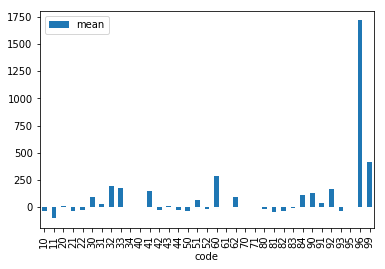

In [26]:
data_03_2 = pd.DataFrame({"code": code, "mean": per_03_2})
data_03_2.plot(x = "code", y = "mean", kind = 'bar')

### 4월 데이터 가공

In [28]:
adstrd_code_04 = card_04['adstrd_code']
mrhst_induty_cl_code_04 = card_04['mrhst_induty_cl_code']

adstrd_code_new = []
mrhst_induty_cl_code_new = []

for i in adstrd_code_04:
    adstrd_code_new.append(int(i/100000))
    
for i in mrhst_induty_cl_code_04:
    mrhst_induty_cl_code_new.append(int(i/100))

adstrd_code_new

data_card04 = {"receipt_dttm" : card_04['receipt_dttm'], "adstrd_code" : adstrd_code_new, "adstrd_nm" : card_04['adstrd_nm'],
               "mrhst_induty_cl_code": mrhst_induty_cl_code_new, "mrhst_induty_cl_nm" : card_04['mrhst_induty_cl_nm'],
               "selng_cascnt" : card_04['selng_cascnt'], "salamt" : card_04['salamt']}

df_card04 = pd.DataFrame(data_card04)
df_card04.head()

,receipt_dttm,adstrd_code,adstrd_nm,mrhst_induty_cl_code,mrhst_induty_cl_nm,selng_cascnt,salamt
0,20200401,11530,구로5동,92,가정용품수리,43,3458100.0
1,20200401,11680,신사동,42,스포츠의류,1,516800.0
2,20200401,11710,오금동,44,기타잡화,1,85000.0
3,20200401,11620,난향동,21,기타레져업,19,95300.0
4,20200401,11710,가락2동,70,제약회사,7,6700000.0


#### 4월 상반기

In [29]:
is_date = df_card04['receipt_dttm'] < 20200416
df_card04_1 = df_card04[is_date]
df_card04_1.head()

,receipt_dttm,adstrd_code,adstrd_nm,mrhst_induty_cl_code,mrhst_induty_cl_nm,selng_cascnt,salamt
0,20200401,11530,구로5동,92,가정용품수리,43,3458100.0
1,20200401,11680,신사동,42,스포츠의류,1,516800.0
2,20200401,11710,오금동,44,기타잡화,1,85000.0
3,20200401,11620,난향동,21,기타레져업,19,95300.0
4,20200401,11710,가락2동,70,제약회사,7,6700000.0


In [30]:
seoul04_1 = []
seoul04_sum_1 = []

is_code = df_card04_1['adstrd_code'] == 11110

for i in code:
    is_name = df_card04_1['mrhst_induty_cl_code'] == i
    seoul = df_card04_1[is_code & is_name]
    seoul04_1.append(seoul)
    seoul = seoul.astype({'selng_cascnt' : int})
    sum_num = sum(seoul['selng_cascnt'])
    seoul04_sum_1.append(sum_num)
    
print(seoul04_sum_1)
print(code)

mean = []

for i in seoul04_sum_1:
    mean.append(i/15)

Jongrogu04_1 = pd.DataFrame({'code' : code, 'total_sum' : seoul04_sum_1, 'mean' : mean})
Jongrogu04_1

[4928, 8, 3545, 21160, 5727, 47, 3159, 347, 4428, 815, 335238, 7161, 8336, 1884, 8520, 97838, 1592, 751, 213, 23116, 165089, 155203, 13457, 638380, 448, 473, 64165, 1119, 1418, 28313, 1714, 1528, 0, 640, 11938]
[10, 11, 20, 21, 22, 30, 31, 32, 33, 34, 40, 41, 42, 43, 44, 50, 51, 52, 60, 61, 62, 70, 71, 80, 81, 82, 83, 84, 90, 91, 92, 93, 95, 96, 99]


,code,total_sum,mean
0,10,4928,328.533333
1,11,8,0.533333
2,20,3545,236.333333
3,21,21160,1410.666667
4,22,5727,381.800000
5,30,47,3.133333
6,31,3159,210.600000
7,32,347,23.133333
8,33,4428,295.200000
9,34,815,54.333333


### 1월&4월(상반기) 평균 비교

In [31]:
per_04_1 = []

for i in range(0, len(Jongrogu01['mean'])) :
    a = Jongrogu01['mean'][i]
    b = Jongrogu04_1['mean'][i]
    if(a != 0):
        per_04_1.append( ( ( b - a ) / a ) * 100 )
    else:
        per_04_1.append(-1)
per_04_1

[-36.74665933209562,
 -99.78559463986599,
 28.566802668220966,
 -36.136935655117036,
 -29.6822995461422,
 124.95726495726495,
 47.86359077231696,
 263.8951310861423,
 171.71597633136096,
 18.391699092088196,
 0.10903925157096896,
 163.18566646977752,
 -19.308580515798926,
 27.605224963715518,
 -25.63359206957823,
 -33.35756284224789,
 0.024683047234379175,
 -0.7176581680830947,
 367.7647058823529,
 11.703297177422828,
 -64.2160356562953,
 15.030917137835376,
 0.15043989049251158,
 -19.354625494512742,
 -84.88856764245271,
 -70.87950747581355,
 4.182685895540135,
 84.8495575221239,
 129.17171717171715,
 57.50069535502842,
 182.6383981154299,
 -5.271781246540474,
 -1,
 1766.6666666666667,
 4.263634804036248]

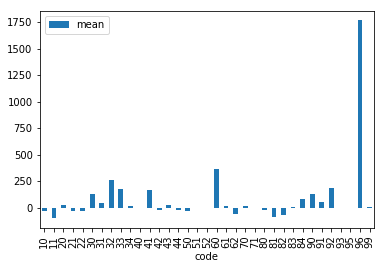

In [32]:
data_04_1 = pd.DataFrame({"code": code, "mean": per_04_1})
data_04_1.plot(x = "code", y = "mean", kind = 'bar')

# '종로구' 의 1월 평균과 2월 평균(상반기)을 각 항목별로 비교한 그래프

## 4월(하반기) 데이터 가공

In [33]:
is_date = df_card04['receipt_dttm'] > 20200415
df_card04_2 = df_card04[is_date]
df_card04_2.head()

,receipt_dttm,adstrd_code,adstrd_nm,mrhst_induty_cl_code,mrhst_induty_cl_nm,selng_cascnt,salamt
385832,20200416,11710,마천2동,80,일식회집,10,516000.0
385833,20200416,11590,사당1동,44,악세 사리,30,451450.0
385834,20200416,11710,잠실2동,80,일반한식,153,1770930.0
385835,20200416,11170,남영동,70,한의원,8,252000.0
385836,20200416,11680,압구정동,70,의원,169,67386370.0


In [34]:
seoul04_2 = []
seoul04_sum_2 = []

is_code = df_card04_2['adstrd_code'] == 11110

for i in code:
    is_name = df_card04_2['mrhst_induty_cl_code'] == i
    seoul = df_card04_2[is_code & is_name]
    seoul04_2.append(seoul)
    seoul = seoul.astype({'selng_cascnt' : int})
    sum_num = sum(seoul['selng_cascnt'])
    seoul04_sum_2.append(sum_num)
    
seoul04_2[0]
print(seoul04_sum_2)
print(code)

mean = []

for i in seoul04_sum_2:
    mean.append(i/15)

Jongrogu04_2 = pd.DataFrame({'code' : code, 'total_sum' : seoul04_sum_2, 'mean' : mean})
Jongrogu04_2

[6045, 370, 3978, 24553, 6920, 61, 3779, 347, 4595, 851, 345516, 6990, 9679, 2650, 10011, 106099, 3158, 879, 166, 23112, 972193, 152876, 14243, 672234, 1399, 890, 64129, 1179, 1464, 25698, 1640, 1614, 0, 584, 62635]
[10, 11, 20, 21, 22, 30, 31, 32, 33, 34, 40, 41, 42, 43, 44, 50, 51, 52, 60, 61, 62, 70, 71, 80, 81, 82, 83, 84, 90, 91, 92, 93, 95, 96, 99]


,code,total_sum,mean
0,10,6045,403.000000
1,11,370,24.666667
2,20,3978,265.200000
3,21,24553,1636.866667
4,22,6920,461.333333
5,30,61,4.066667
6,31,3779,251.933333
7,32,347,23.133333
8,33,4595,306.333333
9,34,851,56.733333


In [35]:
per_04_2 = []

for i in range(0, len(Jongrogu01['mean'])) :
    a = Jongrogu01['mean'][i]
    b = Jongrogu04_2['mean'][i]
    if(a != 0):
        per_04_2.append( ( ( b - a ) / a ) * 100 )
    else:
        per_04_2.append(-1)
per_04_2

[-22.409406587361612,
 -90.08375209380235,
 44.270448805129185,
 -25.896511396034438,
 -15.034313403056409,
 191.96581196581198,
 76.88398528920095,
 263.8951310861423,
 181.96362042515887,
 23.62127107652399,
 3.1782638186774648,
 156.90096475684192,
 -6.30851137385051,
 79.48717948717947,
 -12.619470681754427,
 -27.730575645451257,
 98.41579715022999,
 16.20396600566572,
 264.5490196078432,
 11.683968003313566,
 110.72827170313772,
 13.306227897422865,
 6.000053158971896,
 -15.07791176834844,
 -52.81050475846284,
 -45.20668425681618,
 4.124233831451608,
 94.76106194690266,
 136.6060606060606,
 42.95386816068663,
 170.4358068315665,
 0.0597808037196835,
 -1,
 1603.3333333333335,
 447.0390991749716]

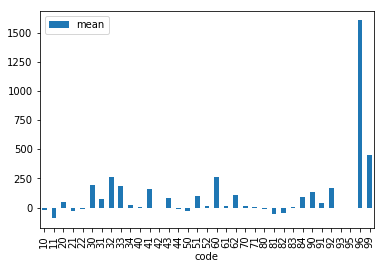

In [36]:
data_04_2 = pd.DataFrame({"code": code, "mean": per_04_2})
data_04_2.plot(x = "code", y = "mean", kind = 'bar')

### 5월 데이터 가공

In [37]:
adstrd_code_05 = card_05['adstrd_code']
mrhst_induty_cl_code_05 = card_05['mrhst_induty_cl_code']

adstrd_code_new = []
mrhst_induty_cl_code_new = []

for i in adstrd_code_05:
    adstrd_code_new.append(int(i/100000))
    
for i in mrhst_induty_cl_code_05:
    mrhst_induty_cl_code_new.append(int(i/100))

adstrd_code_new

data_card05 = {"receipt_dttm" : card_05['receipt_dttm'], "adstrd_code" : adstrd_code_new, "adstrd_nm" : card_05['adstrd_nm'],
               "mrhst_induty_cl_code": mrhst_induty_cl_code_new, "mrhst_induty_cl_nm" : card_05['mrhst_induty_cl_nm'],
               "selng_cascnt" : card_05['selng_cascnt'], "salamt" : card_05['salamt']}

df_card05 = pd.DataFrame(data_card05)
df_card05.head()

,receipt_dttm,adstrd_code,adstrd_nm,mrhst_induty_cl_code,mrhst_induty_cl_nm,selng_cascnt,salamt
0,20200501,11500,화곡2동,83,정 육 점,17.0,481200.0
1,20200501,11215,자양1동,80,스넥,188.0,2777400.0
2,20200501,11560,문래동,61,주 차 장,63.0,375000.0
3,20200501,11620,신사동,80,서양음식,406.0,3421500.0
4,20200501,11200,성수1가2동,61,주 차 장,37.0,259500.0


### 5월 상반기

In [38]:
is_date = df_card05['receipt_dttm'] < 20200516
df_card05_1 = df_card05[is_date]
df_card05_1.head()

,receipt_dttm,adstrd_code,adstrd_nm,mrhst_induty_cl_code,mrhst_induty_cl_nm,selng_cascnt,salamt
0,20200501,11500,화곡2동,83,정 육 점,17.0,481200.0
1,20200501,11215,자양1동,80,스넥,188.0,2777400.0
2,20200501,11560,문래동,61,주 차 장,63.0,375000.0
3,20200501,11620,신사동,80,서양음식,406.0,3421500.0
4,20200501,11200,성수1가2동,61,주 차 장,37.0,259500.0


In [39]:
seoul05_1 = []
seoul05_sum_1 = []

is_code = df_card05_1['adstrd_code'] == 11110

for i in code:
    is_name = df_card05_1['mrhst_induty_cl_code'] == i
    seoul = df_card05_1[is_code & is_name]
    seoul05_1.append(seoul)
    seoul = seoul.astype({'selng_cascnt' : int})
    sum_num = sum(seoul['selng_cascnt'])
    seoul05_sum_1.append(sum_num)
    
print(seoul05_sum_1)
print(code)

mean = []

for i in seoul05_sum_1:
    mean.append(i/15)

Jongrogu05_1 = pd.DataFrame({'code' : code, 'total_sum' : seoul05_sum_1, 'mean' : mean})
Jongrogu05_1

[18126, 2867, 62508, 53043, 102932, 1256, 7316, 3317, 4582, 6411, 169793, 5932, 32633, 18774, 46809, 81379, 48380, 6409, 2497, 43366, 28717, 114447, 77443, 504104, 9898, 4314, 124140, 6446, 380125, 17033, 20211, 34667, 0, 921, 32767]
[10, 11, 20, 21, 22, 30, 31, 32, 33, 34, 40, 41, 42, 43, 44, 50, 51, 52, 60, 61, 62, 70, 71, 80, 81, 82, 83, 84, 90, 91, 92, 93, 95, 96, 99]


,code,total_sum,mean
0,10,18126,1208.400000
1,11,2867,191.133333
2,20,62508,4167.200000
3,21,53043,3536.200000
4,22,102932,6862.133333
5,30,1256,83.733333
6,31,7316,487.733333
7,32,3317,221.133333
8,33,4582,305.466667
9,34,6411,427.400000


### 1월&5월(상반기) 평균 비교

In [40]:
per_05_1 = []

for i in range(0, len(Jongrogu01['mean'])) :
    a = Jongrogu01['mean'][i]
    b = Jongrogu05_1['mean'][i]
    if(a != 0):
        per_05_1.append( ( ( b - a ) / a ) * 100 )
    else:
        per_05_1.append(-1)
per_05_1

[132.65626074400058,
 -23.16247906197655,
 2166.98270837381,
 60.08924962408444,
 1163.8277532943061,
 5911.623931623933,
 242.44065529923105,
 3378.5018726591757,
 181.16589962743808,
 831.2996108949415,
 -49.29627875824939,
 118.01666994815253,
 215.88328839106686,
 1171.5820029027575,
 308.5700925839334,
 -44.56862473210094,
 2939.6948277796478,
 747.2710103871576,
 5383.607843137255,
 109.55724110555971,
 -93.77542959217048,
 -15.175973572199988,
 476.35063657868847,
 -36.3174662901185,
 233.8682086495603,
 165.59366754617417,
 101.56220099855608,
 964.825958702065,
 61334.34343434344,
 -5.248142408709813,
 3232.7915194346288,
 2049.1774604228935,
 -1,
 2586.25,
 186.17913566961434]

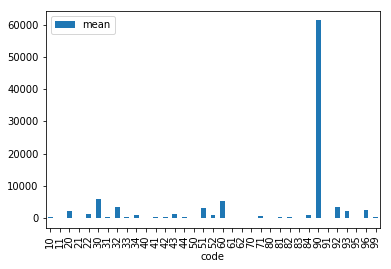

In [41]:
data_05_1 = pd.DataFrame({"code": code, "mean": per_05_1})
data_05_1.plot(x = "code", y = "mean", kind = 'bar')

# '종로구' 의 1월 평균과 2월 평균(상반기)을 각 항목별로 비교한 그래프

## 5월(하반기) 데이터 가공

In [42]:
is_date = df_card05['receipt_dttm'] > 20200515
df_card05_2 = df_card05[is_date]
df_card05_2.head()

,receipt_dttm,adstrd_code,adstrd_nm,mrhst_induty_cl_code,mrhst_induty_cl_nm,selng_cascnt,salamt
389400,20200516,11680,삼성1동,21,스크린골프,462.0,422000.0
389401,20200516,11650,방배4동,83,미곡상,4949.0,190000.0
389402,20200516,11650,서초4동,21,당구장,276.0,188800.0
389403,20200516,11500,가양1동,40,편 의 점,33.0,30976350.0
389404,20200516,11140,소공동,80,스넥,835.0,5590800.0


In [48]:
seoul05_2 = []
seoul05_sum_2 = []

is_code = df_card05_2['adstrd_code'] == 11110

for i in code:
    is_name = df_card05_2['mrhst_induty_cl_code'] == i
    seoul = df_card05_2[is_code & is_name]
    seoul05_2.append(seoul)
    seoul = seoul.astype({'selng_cascnt' : int})
    sum_num = sum(seoul['selng_cascnt'])
    seoul05_sum_2.append(sum_num)
    
seoul05_2[0]
print(seoul05_sum_2)
print(code)

mean = []

for i in seoul05_sum_2:
    mean.append(i/16)

Jongrogu05_2 = pd.DataFrame({'code' : code, 'total_sum' : seoul05_sum_2, 'mean' : mean})
Jongrogu05_2

[21193, 2243, 28252, 119339, 59104, 2200, 23334, 3715, 3126, 15145, 103787, 3077, 59554, 11886, 67565, 49237, 48692, 16395, 9583, 290820, 325834, 408965, 212776, 619226, 6613, 10034, 104189, 116013, 20678, 49114, 20888, 35251, 0, 4568, 25959]
[10, 11, 20, 21, 22, 30, 31, 32, 33, 34, 40, 41, 42, 43, 44, 50, 51, 52, 60, 61, 62, 70, 71, 80, 81, 82, 83, 84, 90, 91, 92, 93, 95, 96, 99]


,code,total_sum,mean
0,10,21193,1324.5625
1,11,2243,140.1875
2,20,28252,1765.7500
3,21,119339,7458.6875
4,22,59104,3694.0000
5,30,2200,137.5000
6,31,23334,1458.3750
7,32,3715,232.1875
8,33,3126,195.3750
9,34,15145,946.5625


In [49]:
per_05_2 = []

for i in range(0, len(Jongrogu01['mean'])) :
    a = Jongrogu01['mean'][i]
    b = Jongrogu05_2['mean'][i]
    if(a != 0):
        per_05_2.append( ( ( b - a ) / a ) * 100 )
    else:
        per_05_2.append(-1)
per_05_2

[155.0213160970914,
 -43.643216080402006,
 860.5789780454633,
 237.66633251952337,
 580.3394066960469,
 9771.794871794873,
 923.9343029087264,
 3552.387640449438,
 79.83234714003945,
 1962.5486381322958,
 -70.94410298578137,
 6.019885804292186,
 440.44544700269654,
 654.7351233671989,
 452.8792200505003,
 -68.55828948424717,
 2768.091551666106,
 1931.9582152974504,
 19629.70588235294,
 1217.4946283879988,
 -33.787804014236194,
 184.16585270948477,
 1384.5626345586477,
 -26.66342048397674,
 109.12088904951212,
 479.1391820580475,
 58.59536732599203,
 17866.61504424779,
 3033.030303030303,
 156.1375014900465,
 3129.1519434628976,
 1948.7960810362003,
 -1,
 12390.625000000002,
 112.54971225377814]

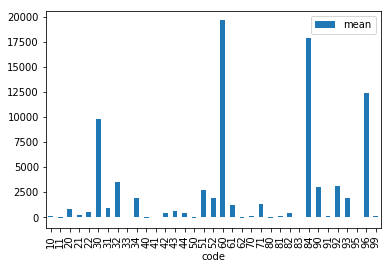

In [50]:
data_05_2 = pd.DataFrame({"code": code, "mean": per_05_2})
data_05_2.plot(x = "code", y = "mean", kind = 'bar')

### 6월 데이터 가공

In [51]:
adstrd_code_06 = card_06['adstrd_code']
mrhst_induty_cl_code_06 = card_06['mrhst_induty_cl_code']

adstrd_code_new = []
mrhst_induty_cl_code_new = []

for i in adstrd_code_06:
    adstrd_code_new.append(int(i/100000))
    
for i in mrhst_induty_cl_code_06:
    mrhst_induty_cl_code_new.append(int(i/100))

adstrd_code_new

data_card06 = {"receipt_dttm" : card_06['receipt_dttm'], "adstrd_code" : adstrd_code_new, "adstrd_nm" : card_06['adstrd_nm'],
               "mrhst_induty_cl_code": mrhst_induty_cl_code_new, "mrhst_induty_cl_nm" : card_06['mrhst_induty_cl_nm'],
               "selng_cascnt" : card_06['selng_cascnt'], "salamt" : card_06['salamt']}

df_card06 = pd.DataFrame(data_card06)
df_card06.head() # 6월은 14알 까지로, 상반기까지만 존재

,receipt_dttm,adstrd_code,adstrd_nm,mrhst_induty_cl_code,mrhst_induty_cl_nm,selng_cascnt,salamt
0,20200601,11560,대림2동,80,주점,74,5471100
1,20200601,11200,성수2가1동,80,일반한식,429,11876060
2,20200601,11560,신길1동,90,기타건축자재,3,59800
3,20200601,11680,일원본동,40,슈퍼 마켓,145,2293030
4,20200601,11560,양평2동,71,사우나,12,102500


### 6월 상반기 (14일까지)

In [52]:
seoul06 = []
seoul06_sum = []

is_code = df_card06['adstrd_code'] == 11110

for i in code:
    is_name = df_card06['mrhst_induty_cl_code'] == i
    seoul = df_card06[is_code & is_name]
    seoul06.append(seoul)
    seoul = seoul.astype({'selng_cascnt' : int})
    sum_num = sum(seoul['selng_cascnt'])
    seoul06_sum.append(sum_num)
    
print(seoul06_sum)
print(code)

mean = []

for i in seoul06_sum:
    mean.append(i/15)

Jongrogu06 = pd.DataFrame({'code' : code, 'total_sum' : seoul06_sum, 'mean' : mean})
Jongrogu06

[7014, 548, 5015, 21054, 7204, 89, 4134, 498, 4929, 792, 367525, 7431, 13375, 2948, 11818, 98293, 1804, 976, 197, 23369, 131072, 141244, 14225, 691930, 46, 1197, 65389, 1261, 1563, 26352, 1610, 1757, 0, 585, 12507]
[10, 11, 20, 21, 22, 30, 31, 32, 33, 34, 40, 41, 42, 43, 44, 50, 51, 52, 60, 61, 62, 70, 71, 80, 81, 82, 83, 84, 90, 91, 92, 93, 95, 96, 99]


,code,total_sum,mean
0,10,7014,467.600000
1,11,548,36.533333
2,20,5015,334.333333
3,21,21054,1403.600000
4,22,7204,480.266667
5,30,89,5.933333
6,31,4134,275.600000
7,32,498,33.200000
8,33,4929,328.600000
9,34,792,52.800000


### 1월&6월(상반기) 평균 비교

In [53]:
per_06 = []

for i in range(0, len(Jongrogu01['mean'])) :
    a = Jongrogu01['mean'][i]
    b = Jongrogu06['mean'][i]
    if(a != 0):
        per_06.append( ( ( b - a ) / a ) * 100 )
    else:
        per_06.append(-1)
per_06

[-9.971807742556546,
 -85.31323283082077,
 81.87941195518422,
 -36.456854597487435,
 -11.547282334626932,
 325.98290598290606,
 93.50050150451358,
 422.247191011236,
 202.45890861275478,
 15.050583657587534,
 9.750608973128408,
 173.1088797007285,
 29.468298416649386,
 99.67102080309627,
 3.1528414227376107,
 -33.04763920412388,
 13.344552900258044,
 29.02738432483474,
 332.6274509803922,
 12.925867439833633,
 -71.58941071508058,
 4.6850051881498365,
 5.866092549770086,
 -12.589752214070305,
 -98.44837971328757,
 -26.30606860158312,
 6.170056074549567,
 108.30678466076698,
 152.60606060606062,
 46.591965669328886,
 165.48881036513544,
 8.925052584966235,
 -1,
 1606.25,
 9.233144621718987]

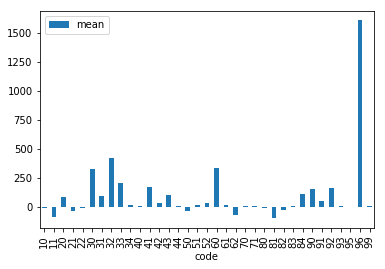

In [54]:
data_06 = pd.DataFrame({"code": code, "mean": per_06})
data_06.plot(x = "code", y = "mean", kind = 'bar')

# '종로구' 의 1월 평균과 2월 평균(상반기)을 각 항목별로 비교한 그래프